In [2]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import numpy as np
from data_utils import get_train_batch, get_val_batch, get_test_batch
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Reshape, BatchNormalization, Flatten, Activation, Dropout
from keras.models import Sequential, Model, load_model
from keras import optimizers, metrics
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler

Using TensorFlow backend.


In [3]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

def plot_image(image, shape=[64, 64, 3]):
    fig = plt.figure(figsize=(8, 8))
    plt.imshow(image)
    plt.axis("off")

def plot_images(images, num_images):
    fig = plt.figure(figsize=(24, 8))
    for i in range(0, num_images):
        fig.add_subplot(num_images//5, 5, i+1)
        plt.imshow(images[i])
        plt.axis("off")
    plt.show()

In [4]:
n_train = 10000
n_val = 500
batch1, batch2 = get_val_batch(0, n_val)
X_val_batch = np.concatenate([batch1, batch2])
X_val_batch = np.reshape(X_val_batch, (-1, 64, 64, 3))
np.random.shuffle(X_val_batch)

In [5]:
initializer = keras.initializers.glorot_uniform(seed = None)
regularizer = keras.regularizers.l2(1e-4)

inputs = Input(shape=(64, 64, 3))
X = Conv2D(128, kernel_size = (3,3), strides = 1, activation = 'relu', padding = 'same', 
                 kernel_initializer = initializer, kernel_regularizer = regularizer)(inputs)
X = BatchNormalization(momentum = 0.9, epsilon = 0.001)(X)
X = Conv2D(128, kernel_size = (3,3), strides = 1, activation = 'relu', padding = 'same', 
                 kernel_initializer = initializer, kernel_regularizer = regularizer)(inputs)
X = BatchNormalization(momentum = 0.9, epsilon = 0.001)(X)
X = MaxPooling2D(pool_size = 2, strides = 2, padding = 'same')(X)
X = Conv2D(64, kernel_size = (3,3), strides = 1, activation = 'relu', padding = 'same', 
                 kernel_initializer = initializer, kernel_regularizer = regularizer)(X)
X = BatchNormalization(momentum = 0.9, epsilon = 0.001)(X)
X = Conv2D(64, kernel_size = (3,3), strides = 1, activation = 'relu', padding = 'same', 
                 kernel_initializer = initializer, kernel_regularizer = regularizer)(X)
X = BatchNormalization(momentum = 0.9, epsilon = 0.001)(X)
X = MaxPooling2D(pool_size = 2, strides = 2, padding = 'same')(X)
X = Conv2D(32, kernel_size = (3,3), strides = 1, activation = 'relu', padding = 'same', 
                 kernel_initializer = initializer, kernel_regularizer = regularizer)(X)
X = BatchNormalization(momentum = 0.9, epsilon = 0.001)(X)
X = Conv2D(32, kernel_size = (3,3), strides = 1, activation = 'relu', padding = 'same', 
                 kernel_initializer = initializer, kernel_regularizer = regularizer)(X)
X = BatchNormalization(momentum = 0.9, epsilon = 0.001)(X)
X = MaxPooling2D(pool_size = 2, strides = 2, padding = 'same')(X)
X = Conv2D(16, kernel_size = (3,3), strides = 1, activation = 'relu', padding = 'same', 
                 kernel_initializer = initializer, kernel_regularizer = regularizer)(X)
X = BatchNormalization(momentum = 0.9, epsilon = 0.001)(X)
X = Conv2D(16, kernel_size = (3,3), strides = 1, activation = 'relu', padding = 'same', 
                 kernel_initializer = initializer, kernel_regularizer = regularizer)(X)
X = BatchNormalization(momentum = 0.9, epsilon = 0.001)(X)
X = MaxPooling2D(pool_size = 2, strides = 2, padding = 'same')(X)
X = Flatten()(X)
encoded = Dense(units = 4*4*16, activation = 'tanh', kernel_initializer = initializer, kernel_regularizer = regularizer)(X)

L1 = Reshape((4, 4, 16))
L2 = Conv2D(16, kernel_size = (3,3), strides = 1, activation = 'relu', padding = 'same', 
                 kernel_initializer = initializer, kernel_regularizer = regularizer)
L3 = BatchNormalization(momentum = 0.9, epsilon = 0.001)
L4 = Conv2D(16, kernel_size = (3,3), strides = 1, activation = 'relu', padding = 'same', 
                 kernel_initializer = initializer, kernel_regularizer = regularizer)
L5 = BatchNormalization(momentum = 0.9, epsilon = 0.001)
L6 = UpSampling2D(size = (2,2), interpolation = 'nearest')
L7 = Conv2D(32, kernel_size = (3,3), strides = 1, activation = 'relu', padding = 'same', 
                 kernel_initializer = initializer, kernel_regularizer = regularizer)
L8 = BatchNormalization(momentum = 0.9, epsilon = 0.001)
L9 = Conv2D(32, kernel_size = (3,3), strides = 1, activation = 'relu', padding = 'same', 
                 kernel_initializer = initializer, kernel_regularizer = regularizer)
L10 = BatchNormalization(momentum = 0.9, epsilon = 0.001)
L11 = UpSampling2D(size = (2,2), interpolation = 'nearest')
L12 = Conv2D(64, kernel_size = (3,3), strides = 1, activation = 'relu', padding = 'same', 
                 kernel_initializer = initializer, kernel_regularizer = regularizer)
L13 = BatchNormalization(momentum = 0.9, epsilon = 0.001)
L14 = Conv2D(64, kernel_size = (3,3), strides = 1, activation = 'relu', padding = 'same', 
                 kernel_initializer = initializer, kernel_regularizer = regularizer)
L15 = BatchNormalization(momentum = 0.9, epsilon = 0.001)
L16 = UpSampling2D(size = (2,2), interpolation = 'nearest')
L17 = Conv2D(128, kernel_size = (3,3), strides = 1, activation = 'relu', padding = 'same', 
                 kernel_initializer = initializer, kernel_regularizer = regularizer)
L18 = BatchNormalization(momentum = 0.9, epsilon = 0.001)
L19 = Conv2D(128, kernel_size = (3,3), strides = 1, activation = 'relu', padding = 'same', 
                 kernel_initializer = initializer, kernel_regularizer = regularizer)
L20 = BatchNormalization(momentum = 0.9, epsilon = 0.001)
L21 = UpSampling2D(size = (2,2), interpolation = 'nearest')
L22 = Conv2D(3, kernel_size = (3,3), strides = 1, activation = 'relu', padding = 'same',
                 kernel_initializer = initializer, kernel_regularizer = regularizer)

X = L1(encoded)
X = L2(X)
X = L3(X)
X = L4(X)
X = L5(X)
X = L6(X)
X = L7(X)
X = L8(X)
X = L9(X)
X = L10(X)
X = L11(X)
X = L12(X)
X = L13(X)
X = L14(X)
X = L15(X)
X = L16(X)
X = L17(X)
X = L18(X)
X = L19(X)
X = L20(X)
X = L21(X)
outputs = L22(X)

# Auto-Encoder
model = Model(inputs, outputs)

# Encoder & Decoder
encoder = Model(inputs, encoded)
decoder_input = Input(shape = (4*4*16,))
D = L1(decoder_input)
D = L2(D)
D = L3(D)
D = L4(D)
D = L5(D)
D = L6(D)
D = L7(D)
D = L8(D)
D = L9(D)
D = L10(D)
D = L11(D)
D = L12(D)
D = L13(D)
D = L14(D)
D = L15(D)
D = L16(D)
D = L17(D)
D = L18(D)
D = L19(D)
D = L20(D)
D = L21(D)
decoded = L22(D)
decoder = Model(decoder_input, decoded)

opt = optimizers.Adam(lr = 5e-4, decay = 0.0, epsilon = 1e-8, amsgrad = False)
model.compile(optimizer = opt, loss = 'mse', metrics = ['mae'])

Instructions for updating:
Colocations handled automatically by placer.


In [6]:
model.summary()
dictionary = {v.name: i for i, v in enumerate(model.layers)}

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 128)       3584      
_________________________________________________________________
batch_normalization_2 (Batch (None, 64, 64, 128)       512       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        73792     
_________________________________________________________________
batch_normalization_3 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 64)        36928     
__________

In [7]:
def batch_data_generator(batch_size):
    while(True):
        batch1, batch2 = get_train_batch(batch_size)
        X_batch = np.concatenate([batch1, batch2])
        X_batch = np.reshape(X_batch, (-1, 64, 64, 3))
        np.random.shuffle(X_batch)
        yield X_batch, X_batch
        
def schedule(epoch, lr):
    decay_rate = 0.5
    decay_step = 250
    if epoch % decay_step == 0 and epoch:
        return lr * decay_rate
    return lr

In [8]:
epochs = 40

batch_size = 25
initial_epoch = 0

CP = ModelCheckpoint(filepath = './models/AutoEncoder_0616_256.hdf5', monitor = 'val_loss', verbose = 1, save_best_only = True, mode = 'auto')
ES = EarlyStopping(monitor = 'val_loss', patience = 30, verbose = 1, mode = 'auto', restore_best_weights = True)
LS = LearningRateScheduler(schedule, verbose = 1)

history = model.fit_generator(batch_data_generator(batch_size), steps_per_epoch = n_train // batch_size, epochs = epochs, verbose = 1,
                             callbacks = [ES, CP], validation_data = (X_val_batch, X_val_batch),
                             shuffle = False, initial_epoch = initial_epoch)
initial_epoch = epochs
encoder.save('./models/Encoder_0616_256.hdf5')
decoder.save('./models/Decoder_0616_256.hdf5')

Instructions for updating:
Use tf.cast instead.
Epoch 1/40
400/400 [==============================] - 520s 1s/step - loss: 0.1052 - mean_absolute_error: 0.0383 - val_loss: 0.0777 - val_mean_absolute_error: 0.0238

Epoch 00001: val_loss improved from inf to 0.07768, saving model to ./models/AutoEncoder_0616_256.hdf5
Epoch 2/40
400/400 [==============================] - 500s 1s/step - loss: 0.0640 - mean_absolute_error: 0.0222 - val_loss: 0.0517 - val_mean_absolute_error: 0.0205

Epoch 00002: val_loss improved from 0.07768 to 0.05174, saving model to ./models/AutoEncoder_0616_256.hdf5
Epoch 3/40
400/400 [==============================] - 503s 1s/step - loss: 0.0425 - mean_absolute_error: 0.0200 - val_loss: 0.0342 - val_mean_absolute_error: 0.0192

Epoch 00003: val_loss improved from 0.05174 to 0.03423, saving model to ./models/AutoEncoder_0616_256.hdf5
Epoch 4/40
400/400 [==============================] - 502s 1s/step - loss: 0.0281 - mean_absolute_error: 0.0179 - val_loss: 0.0226 - val_

Epoch 31/40
400/400 [==============================] - 494s 1s/step - loss: 0.0022 - mean_absolute_error: 0.0061 - val_loss: 0.0023 - val_mean_absolute_error: 0.0063

Epoch 00031: val_loss did not improve from 0.00216
Epoch 32/40
400/400 [==============================] - 494s 1s/step - loss: 0.0021 - mean_absolute_error: 0.0059 - val_loss: 0.0020 - val_mean_absolute_error: 0.0056

Epoch 00032: val_loss improved from 0.00216 to 0.00203, saving model to ./models/AutoEncoder_0616_256.hdf5
Epoch 33/40
400/400 [==============================] - 494s 1s/step - loss: 0.0021 - mean_absolute_error: 0.0058 - val_loss: 0.0020 - val_mean_absolute_error: 0.0057

Epoch 00033: val_loss improved from 0.00203 to 0.00201, saving model to ./models/AutoEncoder_0616_256.hdf5
Epoch 34/40
400/400 [==============================] - 495s 1s/step - loss: 0.0021 - mean_absolute_error: 0.0058 - val_loss: 0.0022 - val_mean_absolute_error: 0.0059

Epoch 00034: val_loss did not improve from 0.00201
Epoch 35/40
400/

In [9]:
opt = optimizers.Adam(lr = 1e-4, decay = 0.0, epsilon = 1e-8, amsgrad = False)
model.compile(optimizer = opt, loss = 'mse', metrics = ['mae'])

In [10]:
epochs = 65

history = model.fit_generator(batch_data_generator(batch_size), steps_per_epoch = n_train // batch_size, epochs = epochs, verbose = 1,
                             callbacks = [ES, CP], validation_data = (X_val_batch, X_val_batch),
                             shuffle = False, initial_epoch = initial_epoch)
initial_epoch = epochs
encoder.save('./models/Encoder_0616_256.hdf5')
decoder.save('./models/Decoder_0616_256.hdf5')

Epoch 41/65
400/400 [==============================] - 502s 1s/step - loss: 0.0014 - mean_absolute_error: 0.0043 - val_loss: 0.0013 - val_mean_absolute_error: 0.0040

Epoch 00041: val_loss improved from 0.00180 to 0.00125, saving model to ./models/AutoEncoder_0616_256.hdf5
Epoch 42/65
400/400 [==============================] - 498s 1s/step - loss: 0.0013 - mean_absolute_error: 0.0041 - val_loss: 0.0012 - val_mean_absolute_error: 0.0039

Epoch 00042: val_loss improved from 0.00125 to 0.00120, saving model to ./models/AutoEncoder_0616_256.hdf5
Epoch 43/65
400/400 [==============================] - 498s 1s/step - loss: 0.0012 - mean_absolute_error: 0.0041 - val_loss: 0.0012 - val_mean_absolute_error: 0.0040

Epoch 00043: val_loss improved from 0.00120 to 0.00117, saving model to ./models/AutoEncoder_0616_256.hdf5
Epoch 44/65
400/400 [==============================] - 498s 1s/step - loss: 0.0012 - mean_absolute_error: 0.0041 - val_loss: 0.0011 - val_mean_absolute_error: 0.0039

Epoch 00044

In [11]:
opt = optimizers.Adam(lr = 5e-5, decay = 0.0, epsilon = 1e-8, amsgrad = False)
model.compile(optimizer = opt, loss = 'mse', metrics = ['mae'])

In [12]:
epochs = 85

history = model.fit_generator(batch_data_generator(batch_size), steps_per_epoch = n_train // batch_size, epochs = epochs, verbose = 1,
                             callbacks = [ES, CP], validation_data = (X_val_batch, X_val_batch),
                             shuffle = False, initial_epoch = initial_epoch)
initial_epoch = epochs
encoder.save('./models/Encoder_0616_256.hdf5')
decoder.save('./models/Decoder_0616_256.hdf5')

Epoch 66/85
400/400 [==============================] - 500s 1s/step - loss: 9.1078e-04 - mean_absolute_error: 0.0036 - val_loss: 8.7429e-04 - val_mean_absolute_error: 0.0034

Epoch 00066: val_loss improved from 0.00096 to 0.00087, saving model to ./models/AutoEncoder_0616_256.hdf5
Epoch 67/85
400/400 [==============================] - 493s 1s/step - loss: 8.8342e-04 - mean_absolute_error: 0.0035 - val_loss: 8.5644e-04 - val_mean_absolute_error: 0.0034

Epoch 00067: val_loss improved from 0.00087 to 0.00086, saving model to ./models/AutoEncoder_0616_256.hdf5
Epoch 68/85
400/400 [==============================] - 493s 1s/step - loss: 8.8296e-04 - mean_absolute_error: 0.0035 - val_loss: 8.5327e-04 - val_mean_absolute_error: 0.0034

Epoch 00068: val_loss improved from 0.00086 to 0.00085, saving model to ./models/AutoEncoder_0616_256.hdf5
Epoch 69/85
400/400 [==============================] - 494s 1s/step - loss: 8.7940e-04 - mean_absolute_error: 0.0035 - val_loss: 8.7281e-04 - val_mean_abs

In [13]:
opt = optimizers.Adam(lr = 1e-5, decay = 0.0, epsilon = 1e-8, amsgrad = False)
model.compile(optimizer = opt, loss = 'mse', metrics = ['mae'])

In [14]:
epochs = 100

history = model.fit_generator(batch_data_generator(batch_size), steps_per_epoch = n_train // batch_size, epochs = epochs, verbose = 1,
                             callbacks = [ES, CP], validation_data = (X_val_batch, X_val_batch),
                             shuffle = False, initial_epoch = initial_epoch)
initial_epoch = epochs
encoder.save('./models/Encoder_0616_256.hdf5')
decoder.save('./models/Decoder_0616_256.hdf5')

Epoch 86/100
400/400 [==============================] - 498s 1s/step - loss: 7.4385e-04 - mean_absolute_error: 0.0032 - val_loss: 7.2266e-04 - val_mean_absolute_error: 0.0031

Epoch 00086: val_loss improved from 0.00079 to 0.00072, saving model to ./models/AutoEncoder_0616_256.hdf5
Epoch 87/100
400/400 [==============================] - 493s 1s/step - loss: 7.3761e-04 - mean_absolute_error: 0.0032 - val_loss: 7.2009e-04 - val_mean_absolute_error: 0.0031

Epoch 00087: val_loss improved from 0.00072 to 0.00072, saving model to ./models/AutoEncoder_0616_256.hdf5
Epoch 88/100
400/400 [==============================] - 493s 1s/step - loss: 7.3399e-04 - mean_absolute_error: 0.0032 - val_loss: 7.2190e-04 - val_mean_absolute_error: 0.0031

Epoch 00088: val_loss did not improve from 0.00072
Epoch 89/100
400/400 [==============================] - 492s 1s/step - loss: 7.2967e-04 - mean_absolute_error: 0.0031 - val_loss: 7.1468e-04 - val_mean_absolute_error: 0.0031

Epoch 00089: val_loss improved 

# Evaluate Losses

In [ ]:
losses = model.evaluate(X_val_batch, X_val_batch, batch_size = 32, verbose = 1)

# Check with Train Data

In [ ]:
batch1, batch2 = get_train_batch(1)
X_batch = np.concatenate([batch1, batch2])
X_batch = np.reshape(X_batch, (-1, 64, 64, 3))
outputs = model.predict_on_batch(X_batch)
plot_image(X_batch[10])
plot_image(outputs[10])

# Check with Validation Data

In [ ]:
batch1, batch2 = get_val_batch(0, 1)
X_batch = np.concatenate([batch1, batch2])
X_batch = np.reshape(X_batch, (-1, 64, 64, 3))
outputs = model.predict_on_batch(X_batch)
plot_images(X_batch, 20)
plot_images(outputs, 20)
plot_image(X_batch[5])
plot_image(outputs[5])

# Check if encoder & decoder work properly

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


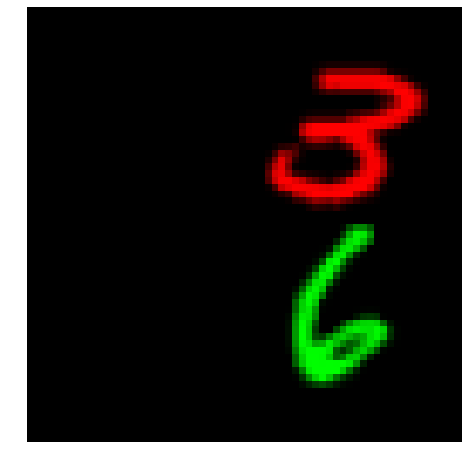

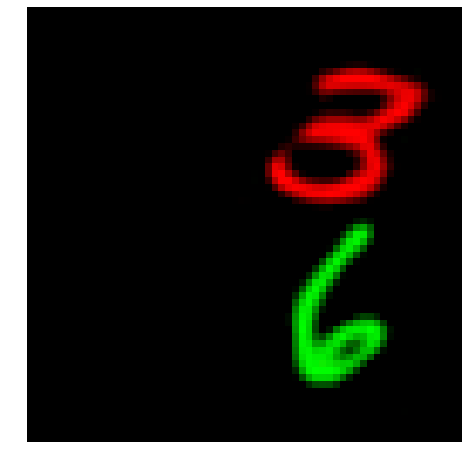

In [15]:
batch1, batch2 = get_train_batch(1)
X_batch = np.concatenate([batch1, batch2])
X_batch = np.reshape(X_batch, (-1, 64, 64, 3))
encoded_imgs = encoder.predict_on_batch(X_batch)
decoded_imgs = decoder.predict_on_batch(encoded_imgs)
plot_image(X_batch[6])
plot_image(decoded_imgs[6])